In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB  # Add this line for Naive Bayes
from xgboost import XGBClassifier
from sklearn.svm import SVC
import pickle
import tkinter as tk
from urllib.parse import urlparse
import requests

In [2]:
url_data = pd.read_csv('5.urldata.csv')
url_data.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


In [3]:
print("Shape of the dataset:", url_data.shape)
print("Columns in the dataset:", url_data.columns)
print("Information about the dataset:")
print(url_data.info())

Shape of the dataset: (10000, 18)
Columns in the dataset: Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'Label'],
      dtype='object')
Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         10000 non-null  object
 1   Have_IP        10000 non-null  int64 
 2   Have_At        10000 non-null  int64 
 3   URL_Length     10000 non-null  int64 
 4   URL_Depth      10000 non-null  int64 
 5   Redirection    10000 non-null  int64 
 6   https_Domain   10000 non-null  int64 
 7   TinyURL        10000 non-null  int64 
 8   Prefix/Suffix  10000 non-null  int64 
 9   DNS_Record     10000 non-null  int6

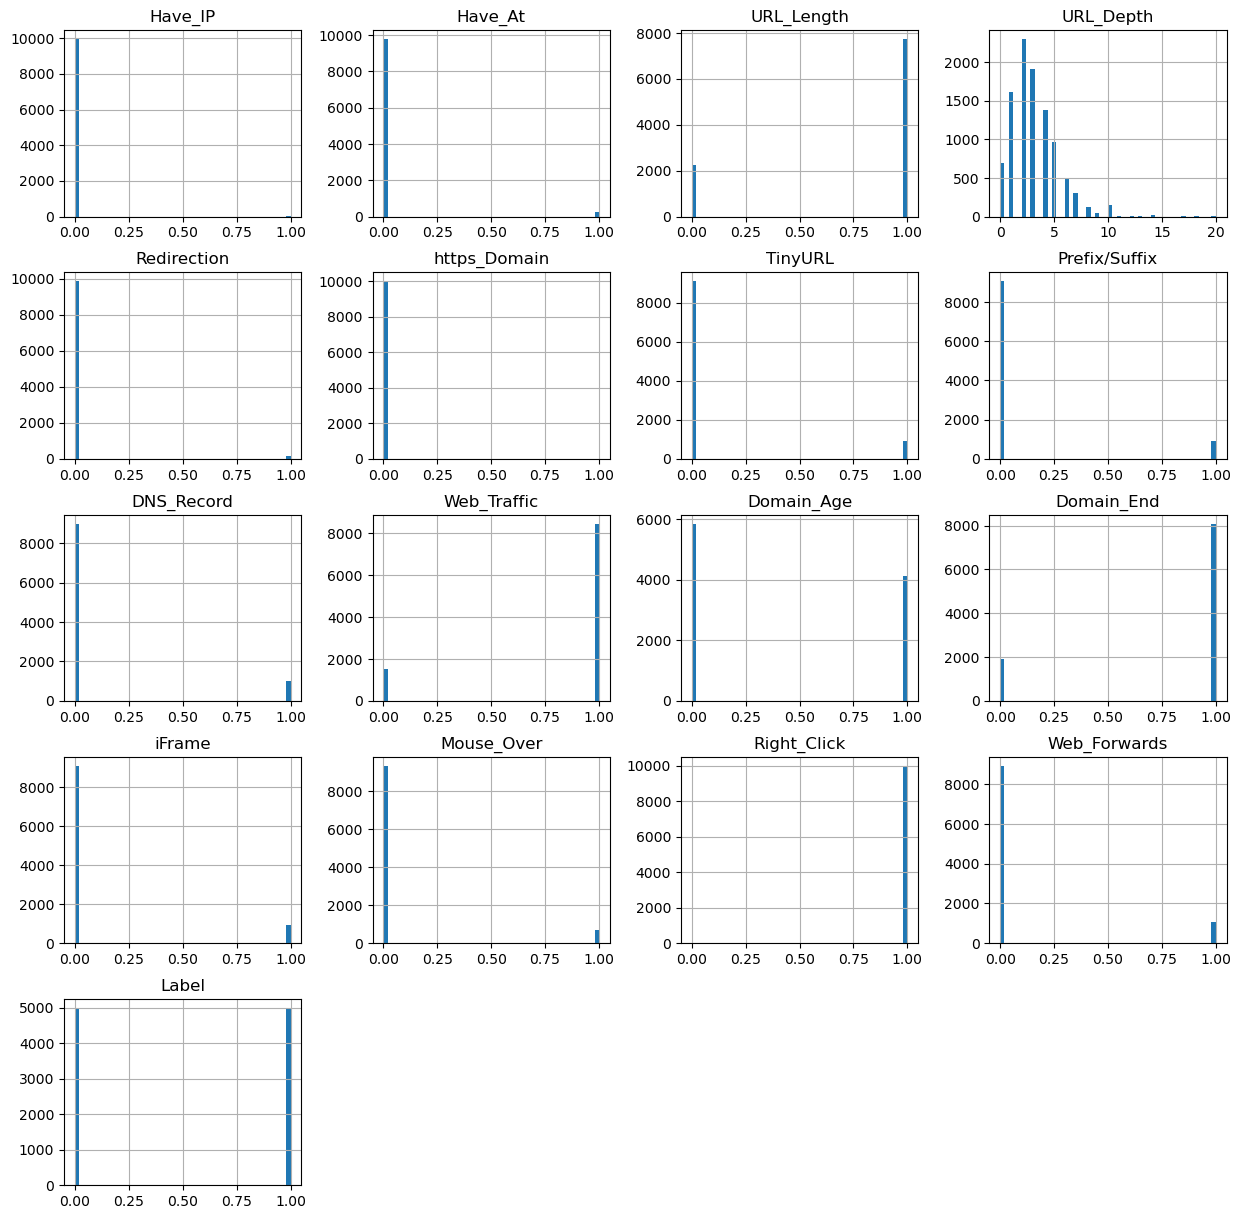

In [4]:
url_data.hist(bins=50, figsize=(15, 15))
plt.show()

C:\Users\SANDEEP\AppData\Local\Temp\ipykernel_8080\4240505247.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(url_data.corr())


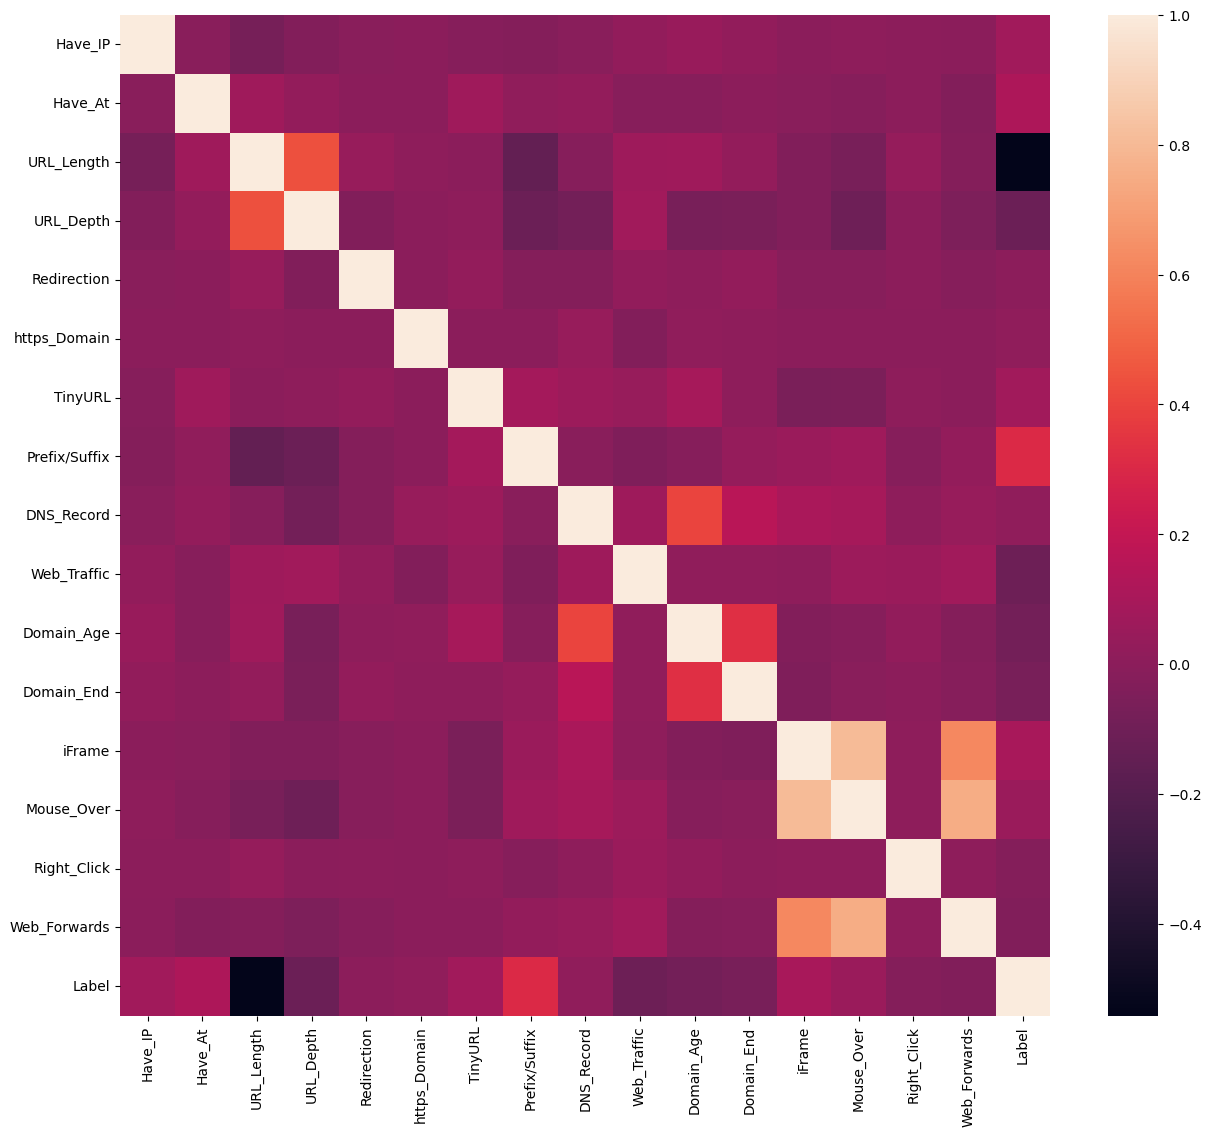

In [5]:
plt.figure(figsize=(15, 13))
sns.heatmap(url_data.corr())
plt.show()

In [6]:
processed_data = url_data.drop(['Domain'], axis=1).copy()
processed_data = processed_data.sample(frac=1).reset_index(drop=True)

In [7]:
y = processed_data['Label']
X = processed_data.drop('Label', axis=1)
print("Shape of features (X):", X.shape)
print("Shape of target variable (y):", y.shape)

Shape of features (X): (10000, 16)
Shape of target variable (y): (10000,)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (8000, 16)
Shape of X_test: (2000, 16)


In [9]:
models = []
train_accuracies = []
test_accuracies = []

In [10]:
decision_tree = DecisionTreeClassifier(max_depth=5)
decision_tree.fit(X_train, y_train)
y_test_dt = decision_tree.predict(X_test)
y_train_dt = decision_tree.predict(X_train)
train_accuracy_dt = accuracy_score(y_train, y_train_dt)
test_accuracy_dt = accuracy_score(y_test, y_test_dt)

In [11]:
print("Decision Tree: Accuracy on training data: {:.3f}".format(train_accuracy_dt))
print("Decision Tree: Accuracy on test data: {:.3f}".format(test_accuracy_dt))
print("Decision Tree:")
print(classification_report(y_test, y_test_dt))

Decision Tree: Accuracy on training data: 0.814
Decision Tree: Accuracy on test data: 0.812
Decision Tree:
              precision    recall  f1-score   support

           0       0.73      0.98      0.84      1000
           1       0.98      0.64      0.77      1000

    accuracy                           0.81      2000
   macro avg       0.85      0.81      0.81      2000
weighted avg       0.85      0.81      0.81      2000



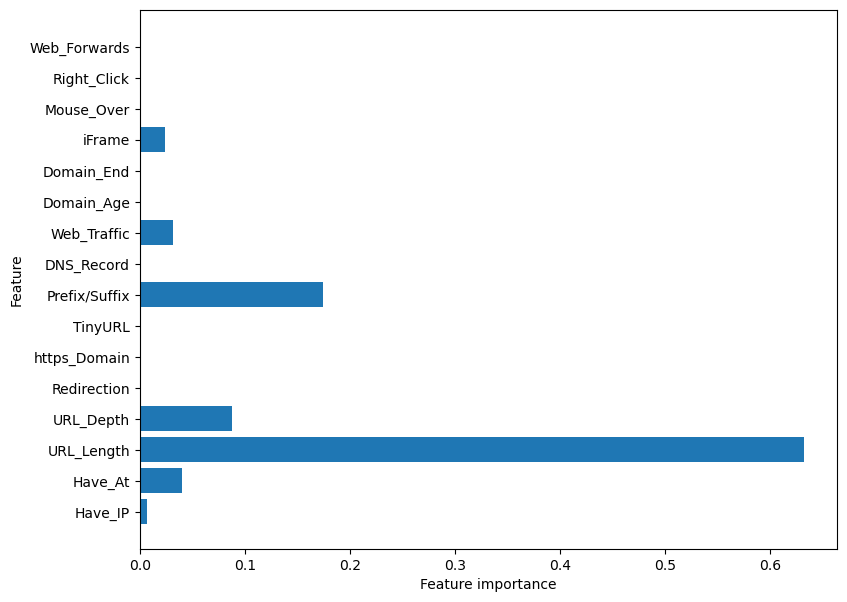

In [12]:
# Feature importance plot for Decision Tree
plt.figure(figsize=(9, 7))
n_features_tree = X_train.shape[1]
plt.barh(range(n_features_tree), decision_tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features_tree), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [13]:
models.append('Decision Tree')
train_accuracies.append(round(train_accuracy_dt, 3))
test_accuracies.append(round(test_accuracy_dt, 3))


In [14]:
# Random Forest
random_forest = RandomForestClassifier(max_depth=5)
random_forest.fit(X_train, y_train)
y_test_rf = random_forest.predict(X_test)
y_train_rf = random_forest.predict(X_train)
train_accuracy_rf = accuracy_score(y_train, y_train_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_rf)

print("Random Forest: Accuracy on training data: {:.3f}".format(train_accuracy_rf))
print("Random Forest: Accuracy on test data: {:.3f}".format(test_accuracy_rf))
print("Random Forest:")
print(classification_report(y_test, y_test_rf))

Random Forest: Accuracy on training data: 0.817
Random Forest: Accuracy on test data: 0.815
Random Forest:
              precision    recall  f1-score   support

           0       0.73      0.99      0.84      1000
           1       0.98      0.64      0.78      1000

    accuracy                           0.81      2000
   macro avg       0.86      0.81      0.81      2000
weighted avg       0.86      0.81      0.81      2000



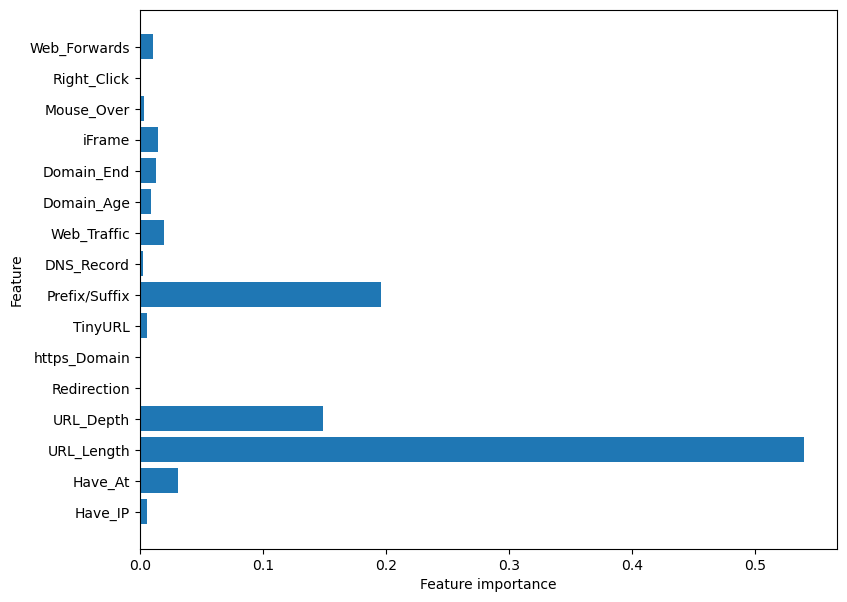

In [15]:
plt.figure(figsize=(9, 7))
n_features_rf = X_train.shape[1]
plt.barh(range(n_features_rf), random_forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features_rf), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [16]:
models.append('Random Forest')
train_accuracies.append(round(train_accuracy_rf, 3))
test_accuracies.append(round(test_accuracy_rf, 3))

In [17]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_test_lr = logistic_regression.predict(X_test)
y_train_lr = logistic_regression.predict(X_train)
train_accuracy_lr = accuracy_score(y_train, y_train_lr)
test_accuracy_lr = accuracy_score(y_test, y_test_lr)

print("Logistic Regression: Accuracy on training data: {:.3f}".format(train_accuracy_lr))
print("Logistic Regression: Accuracy on test data: {:.3f}".format(test_accuracy_lr))
print("Logistic Regression:")
print(classification_report(y_test, y_test_lr))

Logistic Regression: Accuracy on training data: 0.798
Logistic Regression: Accuracy on test data: 0.807
Logistic Regression:
              precision    recall  f1-score   support

           0       0.74      0.95      0.83      1000
           1       0.93      0.66      0.77      1000

    accuracy                           0.81      2000
   macro avg       0.84      0.81      0.80      2000
weighted avg       0.84      0.81      0.80      2000



C:\Users\SANDEEP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
models.append('Logistic Regression')
train_accuracies.append(round(train_accuracy_lr, 3))
test_accuracies.append(round(test_accuracy_lr, 3))

In [19]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
y_test_nb = naive_bayes.predict(X_test)
y_train_nb = naive_bayes.predict(X_train)
train_accuracy_nb = accuracy_score(y_train, y_train_nb)
test_accuracy_nb = accuracy_score(y_test, y_test_nb)

print("Naive Bayes: Accuracy on training data: {:.3f}".format(train_accuracy_nb))
print("Naive Bayes: Accuracy on test data: {:.3f}".format(test_accuracy_nb))
print("Naive Bayes:")
print(classification_report(y_test, y_test_nb))

Naive Bayes: Accuracy on training data: 0.793
Naive Bayes: Accuracy on test data: 0.787
Naive Bayes:
              precision    recall  f1-score   support

           0       0.70      0.99      0.82      1000
           1       0.99      0.58      0.73      1000

    accuracy                           0.79      2000
   macro avg       0.84      0.79      0.78      2000
weighted avg       0.84      0.79      0.78      2000



In [20]:
models.append('Naive Bayes')
train_accuracies.append(round(train_accuracy_nb, 3))
test_accuracies.append(round(test_accuracy_nb, 3))

In [21]:
from xgboost import XGBClassifier

In [22]:
# XGBoost
xgb_model = XGBClassifier(learning_rate=0.4, max_depth=7)
xgb_model.fit(X_train, y_train)
y_test_xgb = xgb_model.predict(X_test)
y_train_xgb = xgb_model.predict(X_train)
train_accuracy_xgb = accuracy_score(y_train, y_train_xgb)
test_accuracy_xgb = accuracy_score(y_test, y_test_xgb)

print("XGBoost: Accuracy on training data: {:.3f}".format(train_accuracy_xgb))
print("XGBoost: Accuracy on test data: {:.3f}".format(test_accuracy_xgb))
print("XGBoost:")
print(classification_report(y_test, y_test_xgb))


XGBoost: Accuracy on training data: 0.868
XGBoost: Accuracy on test data: 0.859
XGBoost:
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      1000
           1       0.92      0.79      0.85      1000

    accuracy                           0.86      2000
   macro avg       0.87      0.86      0.86      2000
weighted avg       0.87      0.86      0.86      2000



In [23]:
models.append('XGBoost')
train_accuracies.append(round(train_accuracy_xgb, 3))
test_accuracies.append(round(test_accuracy_xgb, 3))

In [24]:
pickle.dump(xgb_model, open("XGBoostClassifier.pickle.dat", "wb"))

In [25]:
loaded_model = pickle.load(open("XGBoostClassifier.pickle.dat", "rb"))

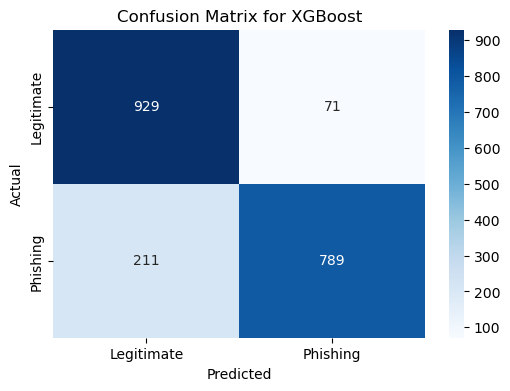

In [26]:
y_pred_xgb = loaded_model.predict(X_test)
confusion_mat_xgb = confusion_matrix(y_test, y_pred_xgb)
class_labels_xgb = ['Legitimate', 'Phishing']
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_mat_xgb, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels_xgb, yticklabels=class_labels_xgb)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for XGBoost')
plt.show()

In [27]:
results_df = pd.DataFrame({'Model': models,
                           'Train Accuracy': train_accuracies,
                           'Test Accuracy': test_accuracies})
print(results_df)

                 Model  Train Accuracy  Test Accuracy
0        Decision Tree           0.814          0.812
1        Random Forest           0.817          0.814
2  Logistic Regression           0.798          0.807
3          Naive Bayes           0.793          0.787
4              XGBoost           0.868          0.859


In [28]:
sorted_results = results_df.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)
print("Sorted Results by Test Accuracy:")
print(sorted_results)

Sorted Results by Test Accuracy:
                 Model  Train Accuracy  Test Accuracy
4              XGBoost           0.868          0.859
1        Random Forest           0.817          0.814
0        Decision Tree           0.814          0.812
2  Logistic Regression           0.798          0.807
3          Naive Bayes           0.793          0.787


In [29]:
# Adding widget

In [30]:
import tkinter as tk
from urllib.parse import urlparse
import requests
import pandas as pd
import pickle

In [31]:
# Load the XGBoost model
loaded_model = pickle.load(open("XGBoostClassifier.pickle.dat", "rb"))

In [32]:
def predict_legitimacy(url):
    # Extract features from the URL
    parsed_url = urlparse(url)
    domain_length = len(parsed_url.netloc)
    path_length = len(parsed_url.path)
    url_length = len(url)
    is_https = 1 if parsed_url.scheme == 'https' else 0

    # Create a DataFrame with the extracted features
    data = pd.DataFrame({
        'Have_IP': [0],  # Replace with appropriate value
        'Have_At': [0],  # Replace with appropriate value
        'URL_Length': [url_length],
        'URL_Depth': [0],  # Replace with appropriate value
        'Redirection': [0],  # Replace with appropriate value
        'https_Domain': [0],  # Replace with appropriate value
        'TinyURL': [0],  # Replace with appropriate value
        'Prefix/Suffix': [0],  # Replace with appropriate value
        'DNS_Record': [0],  # Replace with appropriate value
        'Web_Traffic': [0],  # Replace with appropriate value
        'Domain_Age': [0],  # Replace with appropriate value
        'Domain_End': [0],  # Replace with appropriate value
        'iFrame': [0],  # Replace with appropriate value
        'Mouse_Over': [0],  # Replace with appropriate value
        'Right_Click': [0],  # Replace with appropriate value
        'Web_Forwards': [0]  # Replace with appropriate value
    })

    # Use the loaded XGBoost model to predict
    prediction = loaded_model.predict(data)[0]

    return prediction


In [33]:
def on_predict_button_click():
    url = entry.get()
    
    # Validate URL
    try:
        requests.get(url)
    except requests.exceptions.MissingSchema:
        result_label.config(text="The URL is malicious")
        return

    # Get prediction
    prediction = predict_legitimacy(url)

    # Display prediction
    if prediction == 0:
        result_label.config(text="The URL is legitimate")
    else:
        result_label.config(text="The URL is malicious")



In [34]:
# GUI setup
root = tk.Tk()
root.title("Phishing Website Detector")

''

In [35]:
# Create widgets
label = tk.Label(root, text="Enter URL:")
entry = tk.Entry(root, width=50)
predict_button = tk.Button(root, text="Predict Legitimacy", command=on_predict_button_click)
result_label = tk.Label(root, text="")

In [36]:
label.grid(row=0, column=0, padx=10, pady=10)
entry.grid(row=0, column=1, padx=10, pady=10)
predict_button.grid(row=1, column=0, columnspan=2, pady=10)
result_label.grid(row=2, column=0, columnspan=2, pady=10)

In [37]:
# Run the GUI
root.mainloop()